In [2]:
#importing libs
import re    # for regular expressions 
import nltk  # for text manipulation 
import string 
import warnings 
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt  

pd.set_option("display.max_colwidth", 200) 
warnings.filterwarnings("ignore", category=DeprecationWarning) 

%matplotlib inline

In [3]:
#reading train & test files
train  = pd.read_csv('C:/Users/admin/Desktop/hackathlon dataset/innoplexus sentiment analysis/train_F3WbcTw.csv') 
test = pd.read_csv('C:/Users/admin/Desktop/hackathlon dataset/innoplexus sentiment analysis/test_tOlRoBf.csv')

In [4]:
train.shape, test.shape

((5279, 4), (2924, 3))

In [5]:
train["sentiment"].value_counts()

2    3825
1     837
0     617
Name: sentiment, dtype: int64

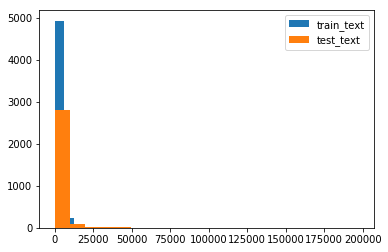

In [6]:
length_train = train['text'].str.len() 
length_test = test['text'].str.len() 
plt.hist(length_train, bins=20, label="train_text") 
plt.hist(length_test, bins=20, label="test_text") 
plt.legend() 
plt.show()

In [7]:
#data cleaning
combi = train.append(test, ignore_index=True) 
combi.shape

C:\Users\admin\Anaconda3\lib\site-packages\pandas\core\frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


(8203, 4)

In [8]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt 

In [9]:
combi['tidy_text'] = np.vectorize(remove_pattern)

In [10]:
#Removing Punctuations, Numbers, and Special Characters
combi['tidy_text'] = combi['text'].str.replace("[^a-zA-Z#]", " ") 
combi.head(10)

,drug,sentiment,text,unique_hash,tidy_text
0,gilenya,2.0,"Autoimmune diseases tend to come in clusters. As for Gilenya – if you feel good, don’t think about it, it won’t change anything but waste your time and energy. I’m taking Tysabri and feel amazing,...",2e180be4c9214c1f5ab51fd8cc32bc80c9f612e0,Autoimmune diseases tend to come in clusters As for Gilenya if you feel good don t think about it it won t change anything but waste your time and energy I m taking Tysabri and feel amazing ...
1,gilenya,2.0,"I can completely understand why you’d want to try it. But, results reported in lectures don’t always stand up to the scrutiny of peer-review during publication. There so much still to do before th...",9eba8f80e7e20f3a2f48685530748fbfa95943e4,I can completely understand why you d want to try it But results reported in lectures don t always stand up to the scrutiny of peer review during publication There so much still to do before th...
2,fingolimod,2.0,"Interesting that it only targets S1P-1/5 receptors rather than 1-5 like Fingolimod. Hoping to soon see what the AEs and SAEs were Yes. I'm not sure what this means, exactly: Quote Nine patients r...",fe809672251f6bd0d986e00380f48d047c7e7b76,Interesting that it only targets S P receptors rather than like Fingolimod Hoping to soon see what the AEs and SAEs were Yes I m not sure what this means exactly Quote Nine patients r...
3,ocrevus,2.0,"Very interesting, grand merci. Now I wonder where lemtrada and ocrevus sales would go, if they prove anti-cd20 are induction",bd22104dfa9ec80db4099523e03fae7a52735eb6,Very interesting grand merci Now I wonder where lemtrada and ocrevus sales would go if they prove anti cd are induction
4,gilenya,1.0,"Hi everybody, My latest MRI results for Brain and Cervical Cord are in and my next Neurologist appointment is in the next couple of weeks. There’re no new lesions in Brain/Cord and I’ve had no rel...",b227688381f9b25e5b65109dd00f7f895e838249,Hi everybody My latest MRI results for Brain and Cervical Cord are in and my next Neurologist appointment is in the next couple of weeks There re no new lesions in Brain Cord and I ve had no rel...
5,cladribine,2.0,I can’t give you advice about Lemtrada because I chose Cladribine. Have you thought about this drug? The doctors at Barts are keen to give it to people with SPMS. You can read about it here: http:...,a043780c757966243779bf3c0d11bf6eef721971,I can t give you advice about Lemtrada because I chose Cladribine Have you thought about this drug The doctors at Barts are keen to give it to people with SPMS You can read about it here http ...
6,humira,0.0,Reply posted for JessZidek. Hi Jess Sorry to read about the challenges you are having with your health. You mentioned a lot in your post. I just want to share some info on a few of the points. Fir...,be5a13376933a7f9bbf8e801c31691092f63260a,Reply posted for JessZidek Hi Jess Sorry to read about the challenges you are having with your health You mentioned a lot in your post I just want to share some info on a few of the points Fir...
7,gilenya,2.0,"Well as expected my Neurologist wants me to start Tysabri, I kept saying that I wasn’t happy and he kept saying Yes you are! But I am still NOT, If Lemtrada was available here I think I would defi...",08c3c0c702fc97d290204b37798ac62005da5626,Well as expected my Neurologist wants me to start Tysabri I kept saying that I wasn t happy and he kept saying Yes you are But I am still NOT If Lemtrada was available here I think I would defi...
8,fingolimod,1.0,"Why do you think that FIngolimod was such a miserable failure in progressive MS trial in humans (not animals) that was aborted by Biogen? If it is in fact stimulating neuronal gene expression, axo...",8fd3d7ad80791c9343e5cf8a83bd1adf6577d516,Why do you think that FIngolimod was such a miserable failure in progressive MS trial in humans not animals that was aborted by Biogen If it is in fact stimulating neuronal gene expression axo...
9,tagrisso,2.0,"Thank you so much…I

In [11]:
#Removing Short Words
combi['tidy_text'] = combi['text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
combi.head()

,drug,sentiment,text,unique_hash,tidy_text
0,gilenya,2.0,"Autoimmune diseases tend to come in clusters. As for Gilenya – if you feel good, don’t think about it, it won’t change anything but waste your time and energy. I’m taking Tysabri and feel amazing,...",2e180be4c9214c1f5ab51fd8cc32bc80c9f612e0,"Autoimmune diseases tend come clusters. Gilenya feel good, don’t think about won’t change anything waste your time energy. taking Tysabri feel amazing, symptoms (other than dodgy color vision, I’v..."
1,gilenya,2.0,"I can completely understand why you’d want to try it. But, results reported in lectures don’t always stand up to the scrutiny of peer-review during publication. There so much still to do before th...",9eba8f80e7e20f3a2f48685530748fbfa95943e4,"completely understand you’d want But, results reported lectures don’t always stand scrutiny peer-review during publication. There much still before this convincing. hope that does work out, really..."
2,fingolimod,2.0,"Interesting that it only targets S1P-1/5 receptors rather than 1-5 like Fingolimod. Hoping to soon see what the AEs and SAEs were Yes. I'm not sure what this means, exactly: Quote Nine patients r...",fe809672251f6bd0d986e00380f48d047c7e7b76,"Interesting that only targets S1P-1/5 receptors rather than like Fingolimod. Hoping soon what SAEs were Yes. sure what this means, exactly: Quote Nine patients reported serious adverse events 3/29..."
3,ocrevus,2.0,"Very interesting, grand merci. Now I wonder where lemtrada and ocrevus sales would go, if they prove anti-cd20 are induction",bd22104dfa9ec80db4099523e03fae7a52735eb6,"Very interesting, grand merci. wonder where lemtrada ocrevus sales would they prove anti-cd20 induction"
4,gilenya,1.0,"Hi everybody, My latest MRI results for Brain and Cervical Cord are in and my next Neurologist appointment is in the next couple of weeks. There’re no new lesions in Brain/Cord and I’ve had no rel...",b227688381f9b25e5b65109dd00f7f895e838249,"everybody, latest results Brain Cervical Cord next Neurologist appointment next couple weeks. There’re lesions Brain/Cord I’ve relapses while Gilenya. This good sign. there line cervical cord revi..."


In [12]:
#text normalization
tokenized_text = combi['tidy_text'].apply(lambda x: x.split()) # tokenizing 
tokenized_text.head()

0    [Autoimmune, diseases, tend, come, clusters., Gilenya, feel, good,, don’t, think, about, won’t, change, anything, waste, your, time, energy., taking, Tysabri, feel, amazing,, symptoms, (other, tha...
1    [completely, understand, you’d, want, But,, results, reported, lectures, don’t, always, stand, scrutiny, peer-review, during, publication., There, much, still, before, this, convincing., hope, tha...
2    [Interesting, that, only, targets, S1P-1/5, receptors, rather, than, like, Fingolimod., Hoping, soon, what, SAEs, were, Yes., sure, what, this, means,, exactly:, Quote, Nine, patients, reported, s...
3                                                                                     [Very, interesting,, grand, merci., wonder, where, lemtrada, ocrevus, sales, would, they, prove, anti-cd20, induction]
4    [everybody,, latest, results, Brain, Cervical, Cord, next, Neurologist, appointment, next, couple, weeks., There’re, lesions, Brain/Cord, I’ve, relapses, while, Gilenya., This

In [13]:
#normalize the tokenized tweets
from nltk.stem.porter import * 
stemmer = PorterStemmer() 
tokenized_text = tokenized_text.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
#stitch these tokens back together
for i in range(len(tokenized_text)):
    tokenized_text[i] = ' '.join(tokenized_text[i])    
combi['tidy_text'] = tokenized_text

In [14]:
# function to collect hashtags 
def hashtag_extract(x):    
    hashtags = []    
# Loop over the words in the tweet    
    for i in x:        
        ht = re.findall(r"#(\w+)", i)        
        hashtags.append(ht)     
    return hashtags

In [15]:
# extracting sentiments from non sentiment texts 
positive = hashtag_extract(combi['tidy_text'][combi['sentiment'] == 0])
negative = hashtag_extract(combi['tidy_text'][combi['sentiment'] == 1])
neutral = hashtag_extract(combi['tidy_text'][combi['sentiment'] == 2])
# unnesting list 
positive = sum(positive,[]) 
negative = sum(negative,[])
neutral = sum(neutral,[])

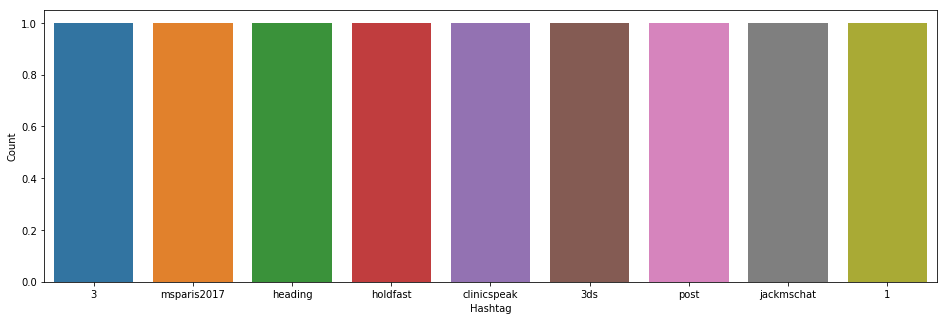

In [16]:
#Non-Racist/Sexist Tweets

a = nltk.FreqDist(positive) 
d = pd.DataFrame({'Hashtag': list(a.keys()),                  
                  'Count': list(a.values())}) 
# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5)) 
ax = sns.barplot(data=d, x= "Hashtag", y = "Count") 
ax.set(ylabel = 'Count') 
plt.show()

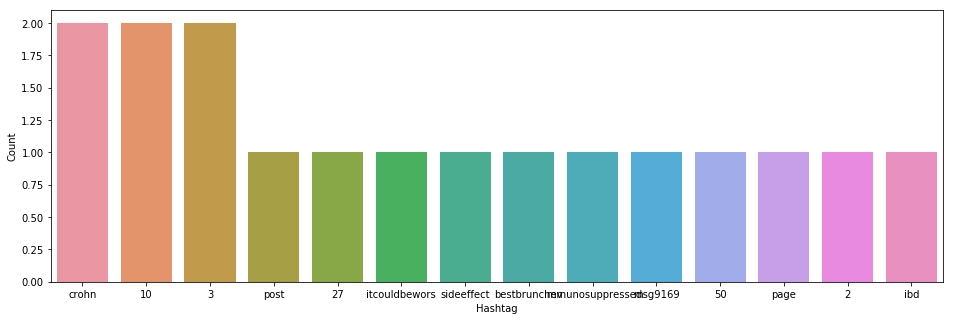

In [17]:
#Non-Racist/Sexist Tweets

a = nltk.FreqDist(negative) 
d = pd.DataFrame({'Hashtag': list(a.keys()),                  
                  'Count': list(a.values())}) 
# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5)) 
ax = sns.barplot(data=d, x= "Hashtag", y = "Count") 
ax.set(ylabel = 'Count') 
plt.show()

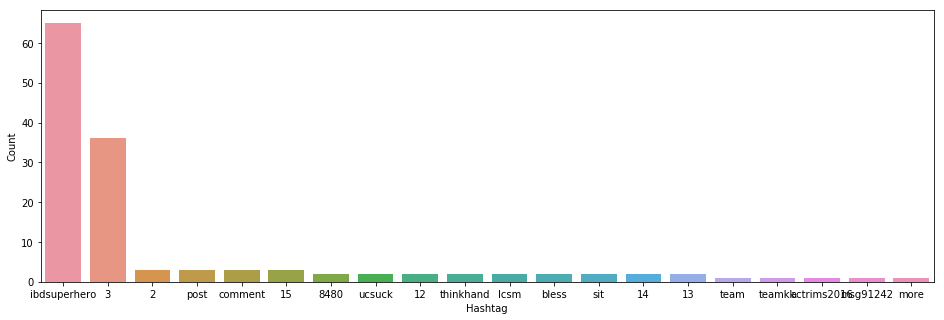

In [18]:

a = nltk.FreqDist(neutral) 
d = pd.DataFrame({'Hashtag': list(a.keys()),                  
                  'Count': list(a.values())}) 
# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5)) 
ax = sns.barplot(data=d, x= "Hashtag", y = "Count") 
ax.set(ylabel = 'Count') 
plt.show()

In [19]:
#Bag-of-Words Features
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english') 
bow = bow_vectorizer.fit_transform(combi['tidy_text']) 
bow.shape

(8203, 1000)

In [20]:
#TF-IDF Features

tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english') 
tfidf = tfidf_vectorizer.fit_transform(combi['tidy_text']) 
tfidf.shape

(8203, 1000)

In [21]:
import gensim

C:\Users\admin\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [22]:
#Word2Vec Features

tokenized_tweet = combi['tidy_text'].apply(lambda x: x.split()) # tokenizing 
model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            size=200, # desired no. of features/independent variables
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34) 

model_w2v.train(tokenized_tweet, total_examples= len(combi['tidy_text']), epochs=20)

(33679144, 36988960)

In [23]:

def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += model_w2v[word].reshape((1, size))
            count += 1.
        except KeyError: 
            # handling the case where the token is not in vocabulary
            if count != 0:
                vec /= count
        return vec

In [24]:
#Preparing word2vec feature set…

wordvec_arrays = np.zeros((len(tokenized_text), 200)) 
for i in range(len(tokenized_text)):
    wordvec_arrays[i,:] = word_vector(tokenized_text[i], 200)
    wordvec_df = pd.DataFrame(wordvec_arrays) 
    wordvec_df.shape

In [25]:
#Doc2Vec Embedding

from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models.doc2vec import LabeledSentence

In [26]:
#labelise or tag each tokenised tweet with unique IDs

def add_label(twt):
    output = []
    for i, s in zip(twt.index, twt):
        output.append(LabeledSentence(s, ["text_" + str(i)]))
    return output
labeled_texts = add_label(tokenized_text) # label all the tweets

In [27]:
#train a doc2vec model.

model_d2v = gensim.models.Doc2Vec(dm=1, # dm = 1 for ‘distributed memory’ model                                   
                                  dm_mean=1, # dm = 1 for using mean of the context word vectors                                  
                                  size=200, # no. of desired features                                  
                                  window=5, # width of the context window                                  
                                  negative=7, # if > 0 then negative sampling will be used                                 
                                  min_count=5, # Ignores all words with total frequency lower than 2.                                  
                                  workers=3, # no. of cores                                  
                                  alpha=0.1, # learning rate                                  
                                  seed = 23) 
model_d2v.build_vocab([i for i in tqdm(labeled_texts)])
model_d2v.train(labeled_texts, total_examples= len(combi['tidy_text']), epochs=15)

C:\Users\admin\Anaconda3\lib\site-packages\gensim\models\doc2vec.py:366: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")
100%|██████████| 8203/8203 [00:00<00:00, 481174.14it/s]


In [ ]:
#Preparing doc2vec Feature Set

docvec_arrays = np.zeros((len(tokenized_text), 200)) 
for i in range(len(combi)):
    docvec_arrays[i,:] = model_d2v.docvecs[i].reshape((1,200))    

docvec_df = pd.DataFrame(docvec_arrays) 
docvec_df.shape

In [ ]:
#modeling

from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import f1_score

In [ ]:
#logistic regression model on the Bag-of_Words (BoW) features

# Extracting train and test BoW features 
train_bow = bow[:31962,:] 
test_bow = bow[31962:,:] 
# splitting data into training and validation set 
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train['label'], random_state=42, test_size=0.3)
lreg = LogisticRegression() 
# training the model 
lreg.fit(xtrain_bow, ytrain) 
prediction = lreg.predict_proba(xvalid_bow) 
# predicting on the validation set 
prediction_int = prediction[:,1] >= 0.3 
# if prediction is greater than or equal to 0.3 than 1 else 0 
prediction_int = prediction_int.astype(np.int) 
f1_score(yvalid, prediction_int) # calculating f1 score for the validation set